## Load

In [11]:
target_ = pd.read_csv("../../dataset/numerai_dataset_221/example_predictions_target_kazutsugi.csv")

In [12]:
target_.shape

(1596622, 2)

In [5]:
tournament_data = pd.read_csv("../../dataset/numerai_dataset_221/numerai_tournament_data.csv")
tournament_data.to_hdf("../../dataset/numerai_dataset_221/numerai_tournament_data.hdf", "pandasdf")

In [5]:
tournament_data.shape

(1596622, 314)

In [8]:
train = pd.read_csv("../../dataset/numerai_dataset_221/numerai_training_data.csv")
train.to_hdf("../../dataset/numerai_dataset_221/numerai_training_data.hdf", "pandasdf")

In [9]:
train.shape

(501808, 314)

---

## 各Dataの期間  
- tournament_dataとtrain_dataで期間とdata_typeが異なる
train: era1 ~ 120(train)  
tournamet_data: era121 ~ 132(validation) + era575~915(test) + eraX(live)

In [16]:
target_.head()

,id,prediction_kazutsugi
0,n0003aa52cab36c2,0.48416
1,n000920ed083903f,0.47641
2,n0038e640522c4a6,0.53401
3,n004ac94a87dc54b,0.50522
4,n0052fe97ea0c05f,0.50236


In [23]:
train.groupby("era").era.count()

era
era1      2408
era10     3336
era100    4748
era101    4730
era102    4704
          ... 
era95     4534
era96     4658
era97     4696
era98     4717
era99     4749
Name: era, Length: 120, dtype: int64

In [26]:
train.data_type.unique()

array(['train'], dtype=object)

In [15]:
tournament_data.head()

,id,era,data_type,feature_intelligence1,feature_intelligence2,feature_intelligence3,feature_intelligence4,feature_intelligence5,feature_intelligence6,feature_intelligence7,feature_intelligence8,feature_intelligence9,feature_intelligence10,feature_intelligence11,feature_intelligence12,feature_charisma1,feature_charisma2,feature_charisma3,feature_charisma4,feature_charisma5,feature_charisma6,feature_charisma7,feature_charisma8,feature_charisma9,feature_charisma10,feature_charisma11,feature_charisma12,feature_charisma13,feature_charisma14,feature_charisma15,feature_charisma16,feature_charisma17,feature_charisma18,feature_charisma19,feature_charisma20,feature_charisma21,feature_charisma22,feature_charisma23,feature_charisma24,feature_charisma25,feature_charisma26,feature_charisma27,feature_charisma28,feature_charisma29,feature_charisma30,feature_charisma31,feature_charisma32,feature_charisma33,feature_charisma34,feature_charisma35,feature_charisma36,feature_charisma37,feature_charisma38,feature_charisma39,feature_charisma40,feature_charisma41,feature_charisma42,feature_charisma43,feature_charisma44,feature_charisma45,feature_charisma46,feature_charisma47,feature_charisma48,feature_charisma49,feature_charisma50,feature_charisma51,feature_charisma52,feature_charisma53,feature_charisma54,feature_charisma55,feature_charisma56,feature_charisma57,feature_charisma58,feature_charisma59,feature_charisma60,feature_charisma61,feature_charisma62,feature_charisma63,feature_charisma64,feature_charisma65,feature_charisma66,feature_charisma67,feature_charisma68,feature_charisma69,feature_charisma70,feature_charisma71,feature_charisma72,feature_charisma73,feature_charisma74,feature_charisma75,feature_charisma76,feature_charisma77,feature_charisma78,feature_charisma79,feature_charisma80,feature_charisma81,feature_charisma82,feature_charisma83,feature_charisma84,feature_charisma85,feature_charisma86,feature_strength1,feature_strength2,feature_strength3,feature_strength4,feature_strength5,feature_strength6,feature_strength7,feature_strength8,feature_strength9,feature_strength10,feature_strength11,feature_strength12,feature_strength13,feature_strength14,feature_strength15,feature_strength16,feature_strength17,feature_strength18,feature_strength19,feature_strength20,feature_strength21,feature_strength22,feature_strength23,feature_strength24,feature_strength25,feature_strength26,feature_strength27,feature_strength28,feature_strength29,feature_strength30,feature_strength31,feature_strength32,feature_strength33,feature_strength34,feature_strength35,feature_strength36,feature_strength37,feature_strength38,feature_dexterity1,feature_dexterity2,feature_dexterity3,feature_dexterity4,feature_dexterity5,feature_dexterity6,feature_dexterity7,feature_dexterity8,feature_dexterity9,feature_dexterity10,feature_dexterity11,feature_dexterity12,feature_dexterity13,feature_dexterity14,feature_constitution1,feature_constitution2,feature_constitution3,feature_constitution4,feature_constitution5,feature_constitution6,feature_constitution7,feature_constitution8,feature_constitution9,feature_constitution10,feature_constitution11,feature_constitution12,feature_constitution13,feature_constitution14,feature_constitution15,feature_constitution16,feature_constitution17,feature_constitution18,feature_constitution19,feature_constitution20,feature_constitution21,feature_constitution22,feature_constitution23,feature_constitution24,feature_constitution25,feature_constitution26,feature_constitution27,feature_constitution28,feature_constitution29,feature_constitution30,feature_constitution31,feature_constitution32,feature_constitution33,feature_constitution34,feature_constitution35,feature_constitution36,feature_constitution37,feature_constitution38,feature_constitution39,feature_constitution40,feature_constitution41,feature_constitution42,feature_constitution43,feature_constitution44,feature_constitution45,feature_constitution46,feature_constitution47,feature_constitution48,feature_con

In [27]:
tournament_data.data_type.unique()

array(['validation', 'test', 'live'], dtype=object)

In [28]:
tournament_data.groupby("data_type").data_type.count()

data_type
live             5214
test          1484513
validation     106895
Name: data_type, dtype: int64

In [36]:
tournament_data.groupby("data_type").era.apply(lambda x : list(x.unique()))

data_type
live                                                     [eraX]
test          [era575, era576, era577, era578, era579, era58...
validation    [era121, era122, era123, era124, era125, era12...
Name: era, dtype: object

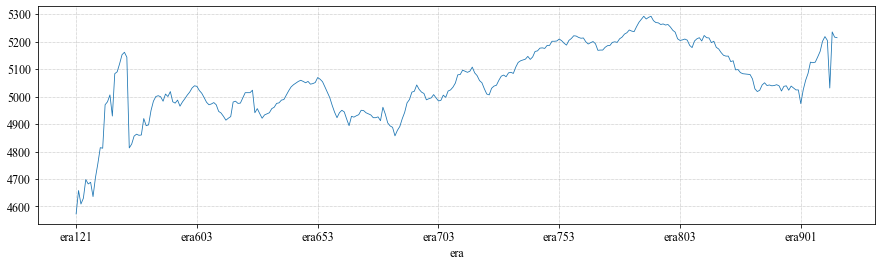

In [38]:
tournament_data.groupby("era").era.count().plot(figsize=(15,4))

---

### Featuresの中身  
- idカラムは行を一意に特定する .... 銘柄コードではないので注意
- featureは種別につき、それぞれ 12 ~ 114種類ある
- featureの値は0.0, 0.25, 0.50, 0.75, 1.0の5値にそれぞれ丸められている. 分位分けされており,それぞれカウントはほぼ同数

In [121]:
train.loc[:, train.columns.str.startswith("feature_")] = train.loc[:, train.columns.str.startswith("feature_")].round(2)

In [122]:
train.loc[:, train.columns.str.startswith("feature_")].describe()

,feature_intelligence1,feature_intelligence2,feature_intelligence3,feature_intelligence4,feature_intelligence5,feature_intelligence6,feature_intelligence7,feature_intelligence8,feature_intelligence9,feature_intelligence10,feature_intelligence11,feature_intelligence12,feature_charisma1,feature_charisma2,feature_charisma3,feature_charisma4,feature_charisma5,feature_charisma6,feature_charisma7,feature_charisma8,feature_charisma9,feature_charisma10,feature_charisma11,feature_charisma12,feature_charisma13,feature_charisma14,feature_charisma15,feature_charisma16,feature_charisma17,feature_charisma18,feature_charisma19,feature_charisma20,feature_charisma21,feature_charisma22,feature_charisma23,feature_charisma24,feature_charisma25,feature_charisma26,feature_charisma27,feature_charisma28,feature_charisma29,feature_charisma30,feature_charisma31,feature_charisma32,feature_charisma33,feature_charisma34,feature_charisma35,feature_charisma36,feature_charisma37,feature_charisma38,feature_charisma39,feature_charisma40,feature_charisma41,feature_charisma42,feature_charisma43,feature_charisma44,feature_charisma45,feature_charisma46,feature_charisma47,feature_charisma48,feature_charisma49,feature_charisma50,feature_charisma51,feature_charisma52,feature_charisma53,feature_charisma54,feature_charisma55,feature_charisma56,feature_charisma57,feature_charisma58,feature_charisma59,feature_charisma60,feature_charisma61,feature_charisma62,feature_charisma63,feature_charisma64,feature_charisma65,feature_charisma66,feature_charisma67,feature_charisma68,feature_charisma69,feature_charisma70,feature_charisma71,feature_charisma72,feature_charisma73,feature_charisma74,feature_charisma75,feature_charisma76,feature_charisma77,feature_charisma78,feature_charisma79,feature_charisma80,feature_charisma81,feature_charisma82,feature_charisma83,feature_charisma84,feature_charisma85,feature_charisma86,feature_strength1,feature_strength2,feature_strength3,feature_strength4,feature_strength5,feature_strength6,feature_strength7,feature_strength8,feature_strength9,feature_strength10,feature_strength11,feature_strength12,feature_strength13,feature_strength14,feature_strength15,feature_strength16,feature_strength17,feature_strength18,feature_strength19,feature_strength20,feature_strength21,feature_strength22,feature_strength23,feature_strength24,feature_strength25,feature_strength26,feature_strength27,feature_strength28,feature_strength29,feature_strength30,feature_strength31,feature_strength32,feature_strength33,feature_strength34,feature_strength35,feature_strength36,feature_strength37,feature_strength38,feature_dexterity1,feature_dexterity2,feature_dexterity3,feature_dexterity4,feature_dexterity5,feature_dexterity6,feature_dexterity7,feature_dexterity8,feature_dexterity9,feature_dexterity10,feature_dexterity11,feature_dexterity12,feature_dexterity13,feature_dexterity14,feature_constitution1,feature_constitution2,feature_constitution3,feature_constitution4,feature_constitution5,feature_constitution6,feature_constitution7,feature_constitution8,feature_constitution9,feature_constitution10,feature_constitution11,feature_constitution12,feature_constitution13,feature_constitution14,feature_constitution15,feature_constitution16,feature_constitution17,feature_constitution18,feature_constitution19,feature_constitution20,feature_constitution21,feature_constitution22,feature_constitution23,feature_constitution24,feature_constitution25,feature_constitution26,feature_constitution27,feature_constitution28,feature_constitution29,feature_constitution30,feature_constitution31,feature_constitution32,feature_constitution33,feature_constitution34,feature_constitution35,feature_constitution36,feature_constitution37,feature_constitution38,feature_constitution39,feature_constitution40,feature_constitution41,feature_constitution42,feature_constitution43,feature_constitution44,feature_constitution45,feature_constitution46,feature_constitution47,feature_constitution48,feature_constitution49,featu

In [124]:
feature_groups = {
    g: [c for c in train if c.startswith(f"feature_{g}")]
    for g in ["intelligence", "wisdom", "charisma", "dexterity", "strength", "constitution"]
}

In [125]:
for name, array in feature_groups.items(): print(name, len(array))  # dexは"器用さ","熟練度"

intelligence 12
wisdom 46
charisma 86
dexterity 14
strength 38
constitution 114


In [126]:
train[feature_groups["intelligence"]].apply(lambda x: len(np.unique(x)), axis=0)

feature_intelligence1     7
feature_intelligence2     5
feature_intelligence3     5
feature_intelligence4     5
feature_intelligence5     5
feature_intelligence6     5
feature_intelligence7     5
feature_intelligence8     5
feature_intelligence9     5
feature_intelligence10    5
feature_intelligence11    5
feature_intelligence12    5
dtype: int64

In [127]:
train.feature_charisma1.round(2).unique().max()

1.0

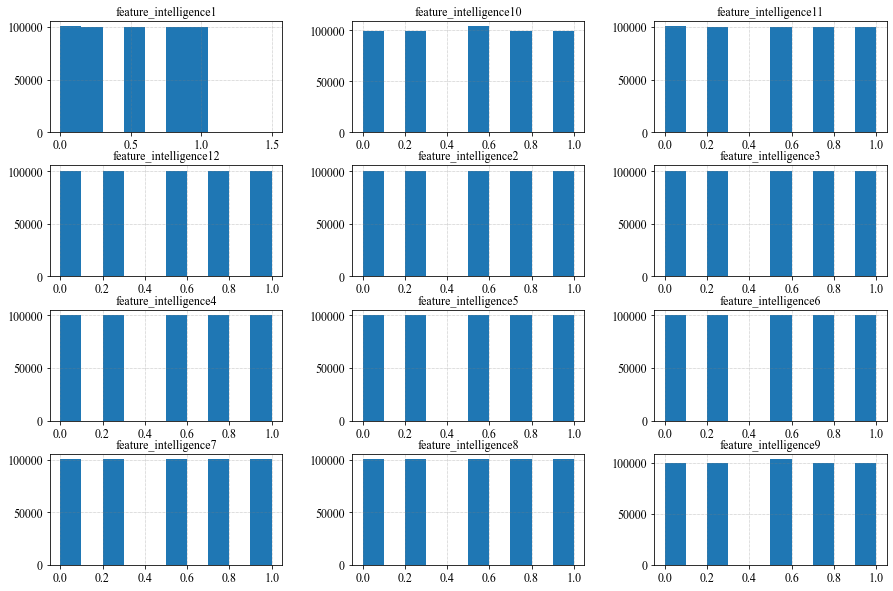

In [114]:
train[feature_groups["intelligence"]].hist(figsize=(15,10));

---
## Target

In [133]:
train["target_kazutsugi"].round(2).unique()

array([0.75, 0.25, 0.  , 0.5 , 1.  ])

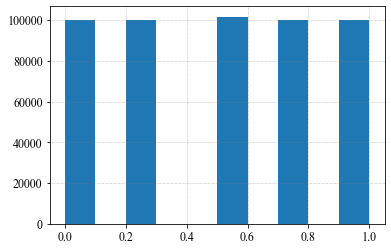

In [134]:
train["target_kazutsugi"].hist()

In [131]:
target_

,id,prediction_kazutsugi
0,n0003aa52cab36c2,0.48416
1,n000920ed083903f,0.47641
2,n0038e640522c4a6,0.53401
3,n004ac94a87dc54b,0.50522
4,n0052fe97ea0c05f,0.50236
...,...,...
1596617,nffcc17d1f826dfb,0.48571
1596618,nffdf07d10258832,0.50887
1596619,nffe4987b4a95c09,0.52826
1596620,nfff0b03d2ac374c,0.45342


---
## Sample Submission

In [14]:
target_

,id,prediction_kazutsugi
0,n0003aa52cab36c2,0.48416
1,n000920ed083903f,0.47641
2,n0038e640522c4a6,0.53401
3,n004ac94a87dc54b,0.50522
4,n0052fe97ea0c05f,0.50236
...,...,...
1596617,nffcc17d1f826dfb,0.48571
1596618,nffdf07d10258832,0.50887
1596619,nffe4987b4a95c09,0.52826
1596620,nfff0b03d2ac374c,0.45342
